In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
from scipy import ndimage

# Pre-destab bands

In [254]:
k=0
df_m=pd.read_csv('f_profiles_m_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
df_rho=pd.read_csv('f_profiles_rho_run%d.dat'%(k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
df_m.shape

(29977, 601)

$\rho_0 = 3$, $l_x = 200$, $l_y = 100$, $\beta = 2$, $v = 1$, $D = 0.02$

([<matplotlib.axis.YTick at 0x7faa07073810>,
 <a list of 6 Text yticklabel objects>)

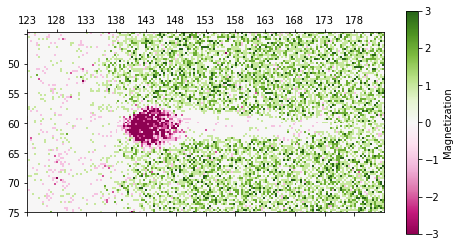

In [276]:
kt=60
t0=np.unique(df_m.t)[kt]

X_m=df_m[df_m.t==t0].drop(columns=['t']).values

v0=np.min(np.min(X_m))/5
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
cbar=plt.colorbar()
cbar.set_label('Magnetization')
plt.xlim(370,550)
plt.ylim(150,241)

plt.xticks(np.arange(370,550, 15), np.arange(np.int64(370/3),np.int64(550/3), 5))
plt.yticks(np.arange(150,241, 15), np.arange(np.int64(150/3),np.int64(241/3), 5)[::-1])

([<matplotlib.axis.YTick at 0x7faa07141350>,
 <a list of 5 Text yticklabel objects>)

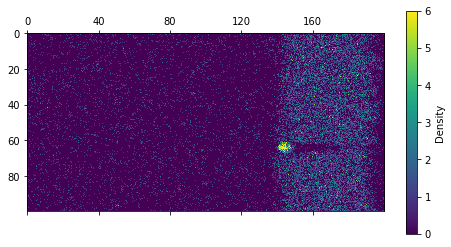

In [275]:
X_rho=df_rho[df_rho.t==t0].drop(columns=['t'])
plt.matshow(X_rho, vmax=6)

cbar = plt.colorbar()
cbar.set_label('Density')

plt.xticks(np.arange(0,600, 120), np.arange(np.int64(0),np.int64(600/3), 40))
plt.yticks(np.arange(0,300, 60), np.arange(np.int64(0),np.int64(100), 20))

In [377]:
X_m_smooth=(np.cumsum(np.roll(X_m, shift=-10, axis=1), axis=1)-np.cumsum(X_m, axis=1))/10

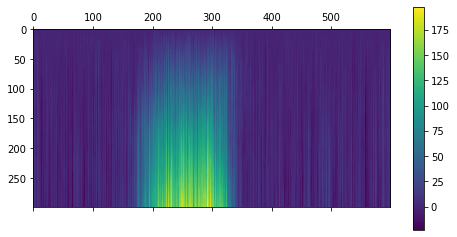

In [374]:
plt.matshow(np.cumsum(np.roll(X_m, shift=-10, axis=0), axis=0))
plt.colorbar()

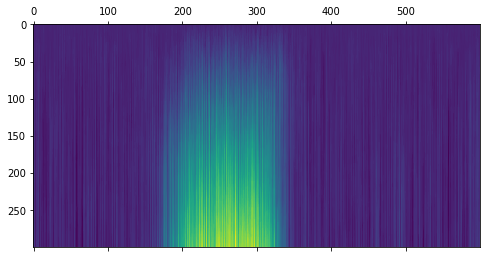

In [371]:
plt.matshow(np.cumsum(np.roll(X_m, 0, axis=0), axis=0))

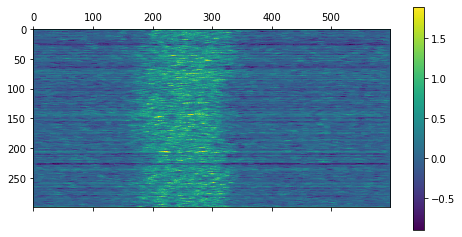

In [388]:
plt.matshow(X_m_smooth)
plt.colorbar()

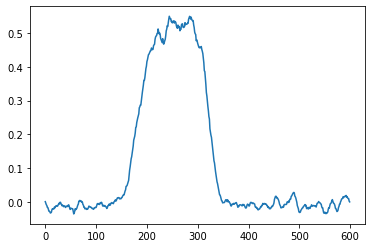

In [380]:
plt.plot(np.mean(X_m_smooth,0))

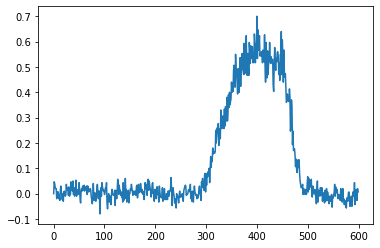

In [391]:
plt.plot(np.mean(X_m,0))

In [381]:
def running_mean(X, win=10):
    Xs=(np.cumsum(np.roll(X, shift=-win, axis=1), axis=1)-np.cumsum(X, axis=1))/win
    return(Xs)

In [395]:
np.sum(running_mean(X_m, win=10)[76,:])

45.0

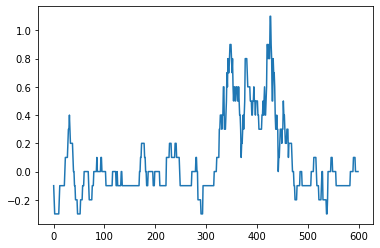

In [394]:
plt.plot(running_mean(X_m, win=10)[76,:])

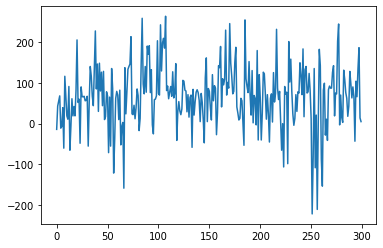

In [402]:
plt.plot(np.sum(running_mean(X_m, win=10), 1))

In [404]:
from scipy.signal import convolve2d

In [405]:
kernel = np.ones((3,3))
kernel /= kernel.size

In [407]:
X_ms=convolve2d(X_m, kernel, mode='same', boundary='wrap')

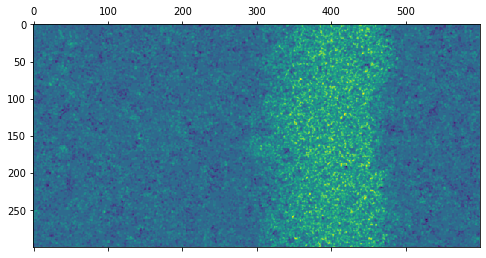

In [408]:
plt.matshow(X_ms)

In [409]:
min_mag=[]
argmin=[]
for t0 in np.unique(df_m.t)[10:-10]:
    X=df_m[df_m.t==t0].drop(columns=['t']).values
    #X=running_mean(X, win=10)
    X=convolve2d(X, kernel, mode='same', boundary='wrap')
    min_mag.append(np.min(np.sum(X, 1)))
    argmin.append(np.argmin(np.sum(X, 1)))

In [410]:
argmin[42]

12

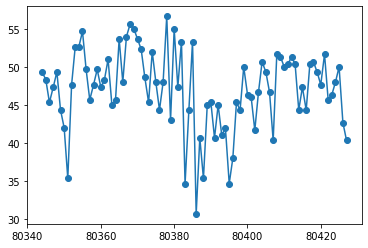

In [411]:
plt.plot(np.unique(df_m.t)[10:-10], min_mag, 'o-')
#plt.ylim(-2, 2)

In [412]:
np.argmin(min_mag)

42

In [339]:
np.unique(df_m.t)[10:-10][42]

80386.03

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


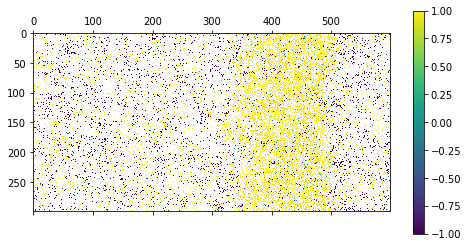

In [303]:
plt.matshow(X_m/X_rho)
plt.colorbar()

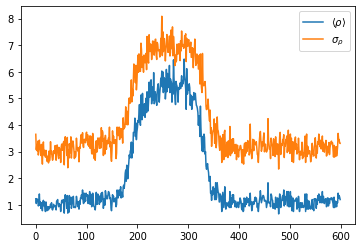

In [369]:
plt.plot(np.mean(9*X_rho,0), label=r'$\langle \rho \rangle$')
plt.plot(np.std(9*X_rho,0), label=r'$\sigma_{\rho}$')
plt.legend()

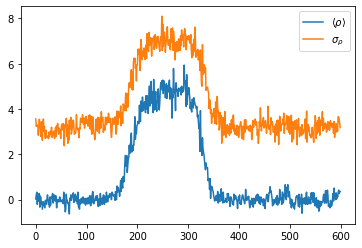

In [370]:
plt.plot(np.mean(9*X_m,0), label=r'$\langle \rho \rangle$')
plt.plot(np.std(9*X_m,0), label=r'$\sigma_{\rho}$')
plt.legend()

# Shape of the propagating droplet

In [1]:
list_D=[0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]

In [128]:
df_m={}
df_rho={}
k=1
for D in list_D:
    print(D)
    try:
        df_m[D]=pd.read_csv('destab_shape/D%s/f_profiles_m_run%d.dat'%(str(D), k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
        df_rho[D]=pd.read_csv('destab_shape/D%s/f_profiles_rho_run%d.dat'%(str(D), k), sep=' ', names=['t']+[str(a) for a in np.arange(600)], index_col=False, dtype=np.float64)
    except:pass

0.005
0.01
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2


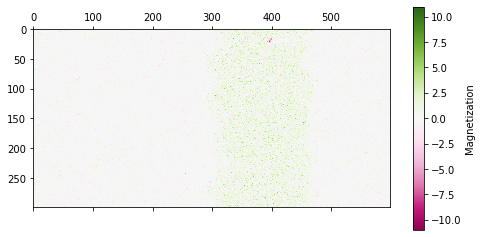

In [136]:
kt=50
D=0.02

t0=np.unique(df_m[D].t)[kt]

X_m=df_m[D][df_m[D].t==t0].drop(columns=['t']).values

v0=np.min(np.min(X_m))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
cbar=plt.colorbar()
cbar.set_label('Magnetization')


In [79]:
def mean_filter(X):
    return((np.roll(X, 1, axis=0)+np.roll(X, -1, axis=0)+np.roll(X, 1, axis=1)+np.roll(X, -1, axis=1)+X)/5)

In [252]:
surf={}
size={}
trace={}
lx=600

mag_thresh=0.5

for D in list_D[:6]:
    print(D)
    surf[D]=[]
    size[D]=[]
    trace[D]=[]
    vec_t=np.unique(df_m[D].t)
    trace[D]=(np.zeros_like(df_m[D][df_m[D].t==vec_t[-25]].drop(columns=['t']).values))==1
    
    # Shift the whole lattice to avoid PBC issues
    t0=vec_t[40]
    X=df_m[D][df_m[D].t==t0].drop(columns=['t']).values

    lab_array, ng = ndimage.label((mean_filter(X)<-mag_thresh), np.ones((3,3)))
    lab, nlab = np.unique(lab_array, return_counts=True)

    X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
    trace[D]=trace[D]|X_clust
    
    
    y, x = np.where(X_clust)
    X=np.roll(X, np.int64(lx/2)-np.int64(np.mean(x)), axis=1)


    size[D].append(np.max(np.sum(X_clust, axis=0)))
    surf[D].append(np.sum(X_clust))
    
    
    for t0 in vec_t[41:]:
        X=df_m[D][df_m[D].t==t0].drop(columns=['t']).values
        X=np.roll(X, np.int64(lx/2)-np.int64(np.mean(x)), axis=1)

        lab_array, ng = ndimage.label((mean_filter(X)<-mag_thresh), np.ones((3,3)))
        lab, nlab = np.unique(lab_array, return_counts=True)
        
        try:
            X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
            trace[D]=trace[D]|X_clust
        except:pass
            
        
        size[D].append(np.max(np.sum(X_clust, axis=0)))
        surf[D].append(np.sum(X_clust))

    lab_array_0, ng_0 = ndimage.label(trace[D], np.ones((3,3)))
    lab_0, nlab_0 = np.unique(lab_array_0, return_counts=True)
    trace[D]=(lab_array_0==lab_0[np.argsort(nlab_0)[-2]])

0.005
0.01
0.02
0.04
0.06
0.08


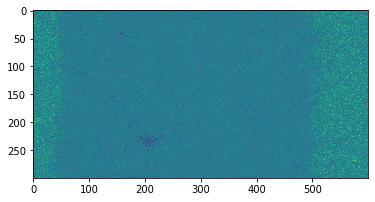

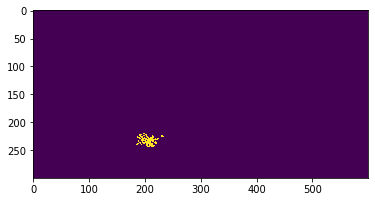

In [239]:
D=0.08
vec_t=np.unique(df_m[D].t)
t0=vec_t[103]
X=df_m[D][df_m[D].t==t0].drop(columns=['t']).values

lab_array, ng = ndimage.label((mean_filter(X)<-0.5), np.ones((3,3)))
lab, nlab = np.unique(lab_array, return_counts=True)

X_clust=(lab_array==lab[np.argsort(nlab)[-2]])
plt.imshow(X)
plt.show()
plt.imshow(X_clust)

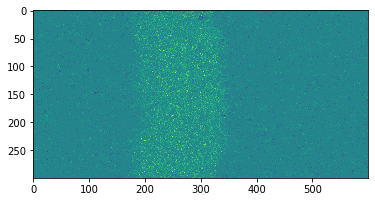

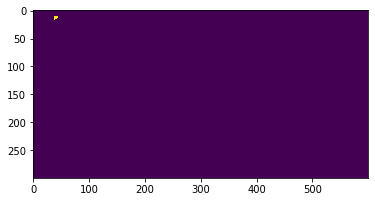

In [223]:
y, x = np.where(X_clust)
X_roll=np.roll(X, 300-np.int64(np.mean(x)), axis=1)
plt.imshow(X_roll)
plt.show()
plt.imshow(X_clust)

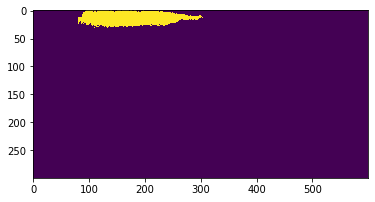

In [249]:
D=0.06
plt.imshow(trace[D])

Text(0, 0.5, 'Surface of the fluctuation')

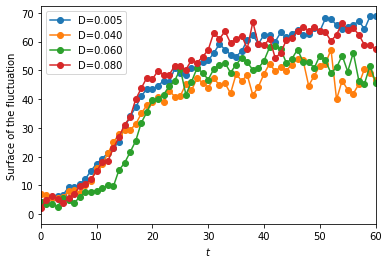

In [278]:
lx=3
ly=3

for D in list_D[:6]:
    if D not in [0.01, 0.02, 0.1]:
        plt.plot(np.array(surf[D])/(lx*ly), 'o-', label='D=%.3f'%D)

    plt.legend()
#plt.yticks([0, 0.005, 0.01, 0.015, 0.02])

plt.xlim(0,60)
plt.xlabel(r'$t$')
plt.ylabel(r'Surface of the fluctuation')

In [ ]:
µ